# Exploratory Code

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED=42

# Dataset

In [2]:
df = pd.read_csv('./data/austin_car_crash.csv')

display(df.head())

/var/folders/y0/rbdj7f755h1cpddq270cg3800000gn/T/ipykernel_58918/450967655.py:1: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/austin_car_crash.csv')


,ID,Crash ID,crash_fatal_fl,case_id,Primary address,Secondary address,rpt_block_num,rpt_street_name,rpt_street_sfx,crash_speed_limit,...,micromobility_serious_injury_count,micromobility_death_count,Crash timestamp (US/Central),Crash timestamp,Is deleted,Is temporary record,Law enforcement fatality count,Reported street prefix,Estimated Maximum Comprehensive Cost,Estimated Total Comprehensive Cost
0,727,13650732.0,False,140080135,8000 NOT REPORTED HWY,ROYAL PALMS DR,8000,NOT REPORTED,HWY,-1.0,...,0,0,01/08/2014 02:34:00 AM,01/08/2014 08:34:00 AM,False,False,0,NaN,20000,20000
1,849,13653672.0,False,140101374,NOT REPORTED,AIRPORT BLVD BLVD,NaN,NOT REPORTED,NaN,-1.0,...,0,0,01/10/2014 05:34:00 PM,01/10/2014 11:34:00 PM,False,False,0,NaN,250000,290000
2,1417,13668262.0,False,140141596,ANTHONY ST,HOLLY ST,NaN,ANTHONY,ST,30.0,...,0,0,01/14/2014 07:25:00 PM,01/15/2014 01:25:00 AM,False,False,0,NaN,20000,40000
3,1295,13665836.0,False,140080823,2800 N LAMAR BLVD,SAN GABRIEL ST,2800,LAMAR,BLVD,35.0,...,0,0,01/08/2014 01:35:00 PM,01/08/2014 07:35:00 PM,False,False,0,NaN,200000,820000
4,1662,13671385.0,False,140190466,1800 LAVACA ST,W 18TH ST,1800,LAVACA,ST,30.0,...,0,0,01/19/2014 05:31:00 AM,01/19/2014 11:31:00 AM,False,False,0,NaN,20000,20000


In [4]:
print(df.shape)

(216088, 45)


In [7]:
print(df.columns)

Index(['ID', 'Crash ID', 'crash_fatal_fl', 'case_id', 'Primary address',
       'Secondary address', 'rpt_block_num', 'rpt_street_name',
       'rpt_street_sfx', 'crash_speed_limit', 'road_constr_zone_fl',
       'latitude', 'longitude', 'crash_sev_id', 'sus_serious_injry_cnt',
       'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt',
       'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt', 'units_involved',
       'point', 'motor_vehicle_death_count',
       'motor_vehicle_serious_injury_count', 'bicycle_death_count',
       'bicycle_serious_injury_count', 'pedestrian_death_count',
       'pedestrian_serious_injury_count', 'motorcycle_death_count',
       'motorcycle_serious_injury_count', 'other_death_count',
       'other_serious_injury_count', 'onsys_fl', 'private_dr_fl',
       'micromobility_serious_injury_count', 'micromobility_death_count',
       'Crash timestamp (US/Central)', 'Crash timestamp', 'Is deleted',
       'Is temporary record', 'Law enforcement fatality count',

# Missing data

In [3]:
display(df.isnull().sum())

ID                                           0
Crash ID                                     6
crash_fatal_fl                               0
case_id                                   2909
Primary address                              0
Secondary address                            2
rpt_block_num                            29058
rpt_street_name                              1
rpt_street_sfx                           66739
crash_speed_limit                            4
road_constr_zone_fl                          6
latitude                                  3549
longitude                                 3550
crash_sev_id                                 0
sus_serious_injry_cnt                        0
nonincap_injry_cnt                           0
poss_injry_cnt                               0
non_injry_cnt                                0
unkn_injry_cnt                               0
tot_injry_cnt                                0
death_cnt                                    0
units_involve

# Distribution

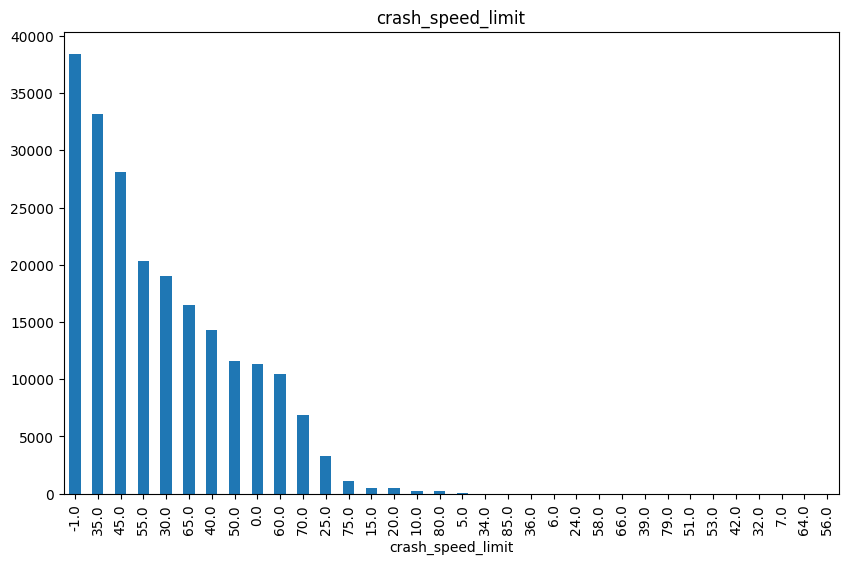

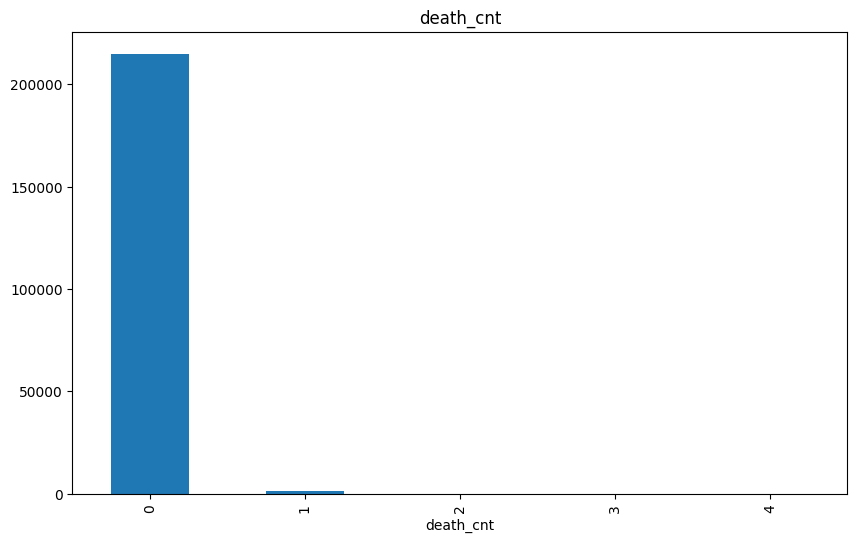

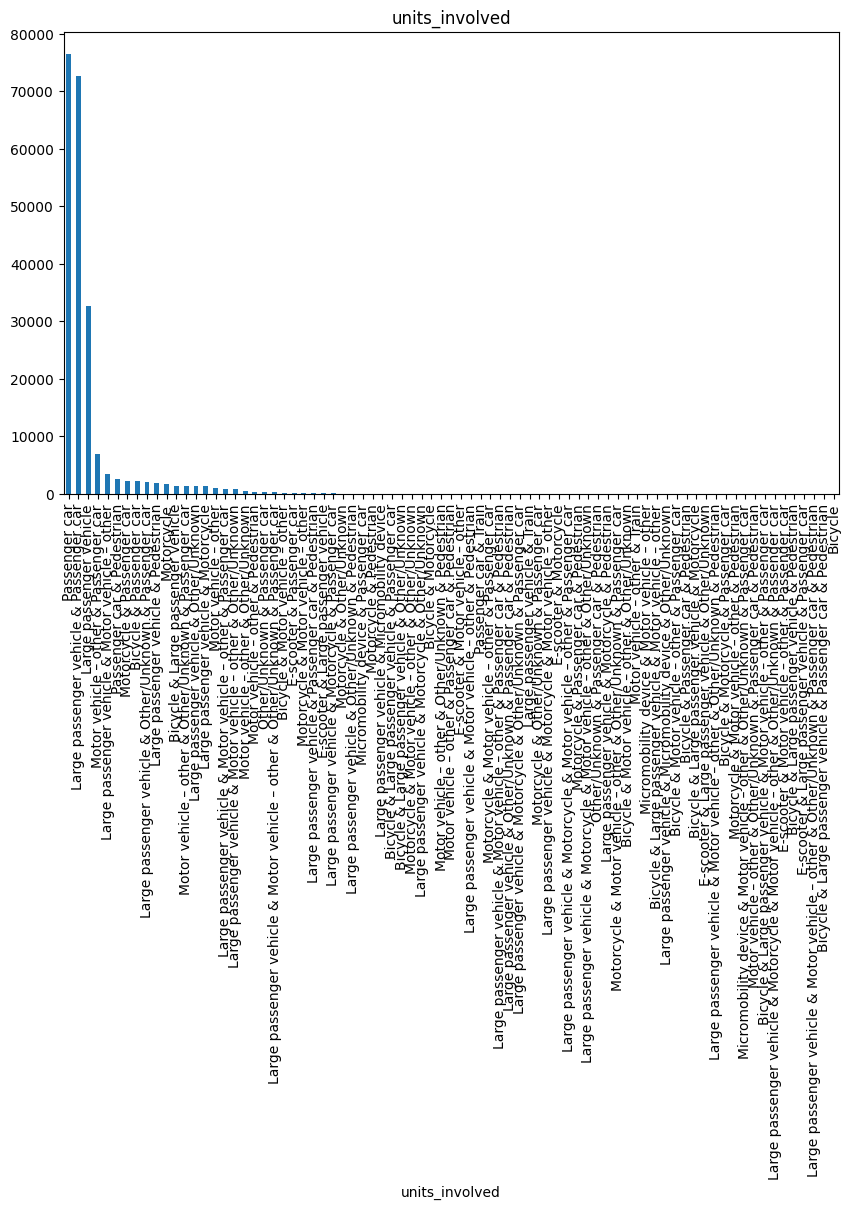

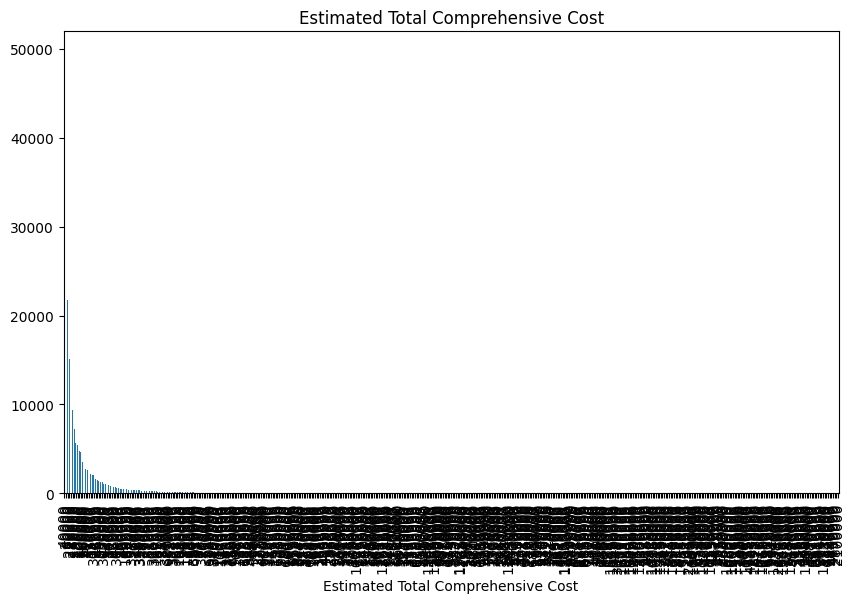

In [10]:
for col in ['crash_speed_limit', 'death_cnt', 'units_involved', 'Estimated Total Comprehensive Cost']:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()